In [1]:
import os
import gzip
from tqdm.auto import tqdm
from pathlib import Path
from math import isclose, ceil
from itertools import product
from itertools import combinations_with_replacement, islice
from collections import defaultdict
import random
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.colors
import matplotlib.cm
from matplotlib import gridspec

import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms

from deep_ei import topology_of, ei_of_layer, vector_ei_of_layer, vector_and_pairwise_ei

In [2]:
########### Set Device ############
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
dtype = torch.float32
torch.set_default_dtype(dtype)
print("Using device: {}".format(device))

Using device: cpu


In [3]:
initializers = {
    'kaiming': None, # (default)
    'xavier_uniform': nn.init.xavier_uniform_,
    'xavier_normal': nn.init.xavier_normal_,
    'paper': nn.init.uniform_
}

def weight_initializer(name):
    def init_weights(m):
        if name == 'kaiming':
            return
        if name == 'paper':
            if isinstance(m, nn.Linear):
                boundary = 1 / np.sqrt(m.in_features)
                nn.init.uniform_(m.weight, a=-boundary, b=boundary)
        elif isinstance(m, nn.Linear):
            initializers[name](m.weight)
    return init_weights

In [4]:
widths = [2, 3, 4, 5, 6]

samples = [10, 20, 50, 100, 200, 500, 1000, 
               2000, 5000, 10000, 
               20000, 50000, 100000, 
               200000, 500000, 1000000,
               2000000, 5000000, 10000000
          ]

database = {w: {} for w in widths}

In [11]:
for w in widths:
    layer = nn.Linear(w, w, bias=False).to(device)
    layer.apply(weight_initializer('paper'))
    top = topology_of(layer, input=torch.zeros((1, w)).to(device))
    for s in tqdm(samples):
        vector_ei, pairwise_ei = vector_and_pairwise_ei(layer, top,
                                                       samples=s,
                                                       batch_size=10000,
                                                       in_range=(0, 1),
                                                       in_bins=8,
                                                       out_range=(0, 1),
                                                       out_bins=8,
                                                       activation=nn.Sigmoid(),
                                                       device=device)
        database[w][s] = (vector_ei, pairwise_ei)
    

In [18]:
with open("convergence-init-database.pkl", 'wb') as f:
    pickle.dump(database, f)

In [92]:
with open("convergence-init-database.pkl", 'rb') as f:
    database = pickle.load(f)

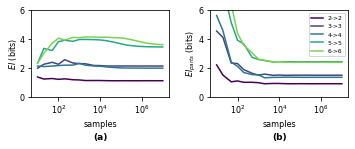

In [93]:
plt.figure(figsize=(5.5, 2.0))

ax = plt.subplot(1, 2, 1)
for i, w in enumerate(widths):
    vector_eis = [database[w][s][0] for s in samples]
    ax.plot(samples, vector_eis, label=f"{w}->{w}", color=matplotlib.cm.viridis(i / len(widths)))
# ax.legend(prop={'size':6}, loc='lower right')
ax.set_xlabel("samples", fontsize=8)
ax.set_ylabel("$EI$ (bits)", fontsize=8)
ax.set_ylim(0, 6)
ax.set_xscale('log')
plt.xticks(size=8)
plt.yticks(size=8)
ax.text(0.5, -0.5, "(a)", size=9, ha="center", weight="bold", 
         transform=ax.transAxes)
ax.yaxis.labelpad = 0


ax = plt.subplot(1, 2, 2)
for i, w in enumerate(widths):
    pairwise_eis = [database[w][s][1] for s in samples]
    ax.plot(samples, pairwise_eis, label=f"{w}->{w}", color=matplotlib.cm.viridis(i / len(widths)))
ax.legend(prop={'size':6}, loc='upper right')
ax.set_xlabel("samples", fontsize=8)
ax.set_ylabel("$EI_{parts}$ (bits)", fontsize=8)
ax.set_ylim(0, 6)
ax.set_xscale('log')
plt.xticks(size=8)
plt.yticks(size=8)
ax.text(0.5, -0.5, "(b)", size=9, ha="center", weight="bold", 
         transform=ax.transAxes)
ax.yaxis.labelpad = 0

plt.subplots_adjust(wspace=0.3, bottom=0.35, left=0.1, right=0.9, top=0.95)
plt.savefig("figures/convergence-init-plots.pdf", dpi=100)

In [54]:
widths = [2, 3, 4, 5, 6]

samples = [10, 20, 50, 100, 200, 500, 1000, 
               2000, 5000, 10000, 
               20000, 50000, 100000, 
               200000, 500000, 1000000,
               2000000, 5000000, 10000000
          ]

database = {w: {} for w in widths}

In [55]:
for w in widths:
    layer = nn.Linear(w, w, bias=False).to(device)
    layer.apply(weight_initializer('paper'))
    layer.weight.data = layer.weight.data * 5
    layer.weight
    top = topology_of(layer, input=torch.zeros((1, w)).to(device))
    for s in tqdm(samples):
        vector_ei, pairwise_ei = vector_and_pairwise_ei(layer, top,
                                                       samples=s,
                                                       batch_size=10000,
                                                       in_range=(0, 1),
                                                       in_bins=8,
                                                       out_range=(0, 1),
                                                       out_bins=8,
                                                       activation=nn.Sigmoid(),
                                                       device=device)
        database[w][s] = (vector_ei, pairwise_ei)
    

In [56]:
with open("convergence-initx5-database.pkl", 'wb') as f:
    pickle.dump(database, f)

In [5]:
with open("convergence-initx5-database.pkl", 'rb') as f:
    database = pickle.load(f)

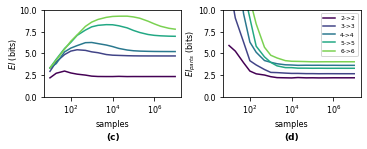

In [7]:
plt.figure(figsize=(5.5, 2.0))

ax = plt.subplot(1, 2, 1)
for i, w in enumerate(widths):
    vector_eis = [database[w][s][0] for s in samples]
    ax.plot(samples, vector_eis, label=f"{w}->{w}", color=matplotlib.cm.viridis(i / len(widths)))
# ax.legend(prop={'size':6}, loc='lower right')
ax.set_xlabel("samples", fontsize=8)
ax.set_ylabel("$EI$ (bits)", fontsize=8)
ax.set_ylim(0, 10)
ax.set_xscale('log')
plt.xticks(size=8)
plt.yticks(size=8)
ax.text(0.5, -0.5, "(c)", size=9, ha="center", weight="bold", 
         transform=ax.transAxes)
ax.yaxis.labelpad = 0


ax = plt.subplot(1, 2, 2)
for i, w in enumerate(widths):
    pairwise_eis = [database[w][s][1] for s in samples]
    ax.plot(samples, pairwise_eis, label=f"{w}->{w}", color=matplotlib.cm.viridis(i / len(widths)))
ax.legend(prop={'size':6}, loc='upper right')
ax.set_xlabel("samples", fontsize=8)
ax.set_ylabel("$EI_{parts}$ (bits)", fontsize=8)
ax.set_ylim(0, 10)
ax.set_xscale('log')
plt.xticks(size=8)
plt.yticks(size=8)
ax.text(0.5, -0.5, "(d)", size=9, ha="center", weight="bold", 
         transform=ax.transAxes)
ax.yaxis.labelpad = 0


plt.subplots_adjust(wspace=0.3, bottom=0.35, left=0.1, right=0.9, top=0.95)
plt.savefig("figures/convergence-initx5-plots.pdf", dpi=100)